In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('train.csv/train.csv')
test_df = pd.read_csv('test/test.csv')
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
i_rows,i_cols = df.shape

In [4]:
df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [6]:
df.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

In [7]:
## Drop columns where only one value is there or different value exists for every row.
unique_cols = ['id','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6',
               'last_date_of_month_7','last_date_of_month_8']

df.drop(unique_cols,axis=1,inplace=True)
test_df.drop(unique_cols,axis=1,inplace=True)

In [8]:
date_cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6',
            'date_of_last_rech_data_7','date_of_last_rech_data_8']

In [9]:
for col in date_cols:
    df[col]=pd.to_datetime(df[col])
    test_df[col]=pd.to_datetime(test_df[col])
    

In [10]:
## Days since last recharge, if null value fill it with 90
def fill_days_since_rech_data(row):
    d1 = datetime(2014,8,31,0,0)
    if(not (pd.isna(row['date_of_last_rech_data_8']))):
        return (d1-row['date_of_last_rech_data_8'].to_pydatetime()).days
    elif(not (pd.isna(row['date_of_last_rech_data_7']))):
        return (d1-row['date_of_last_rech_data_7'].to_pydatetime()).days
    elif(not (pd.isna(row['date_of_last_rech_data_6']))):
        return (d1-row['date_of_last_rech_data_6'].to_pydatetime()).days
    
    return 90
        
    

In [11]:
## Days since last recharge, if null value fill it with 90
def fill_days_since_rech(row):
    d1 = datetime(2014,8,31,0,0)
    if(not (pd.isna(row['date_of_last_rech_8']))):
        return (d1-row['date_of_last_rech_8'].to_pydatetime()).days
    elif(not (pd.isna(row['date_of_last_rech_7']))):
        return (d1-row['date_of_last_rech_7'].to_pydatetime()).days
    elif(not (pd.isna(row['date_of_last_rech_6']))):
        return (d1-row['date_of_last_rech_6'].to_pydatetime()).days
    
    return 90

In [12]:
df['days_since_last_rech_data'] = df.apply(lambda row:fill_days_since_rech_data(row),axis=1)
test_df['days_since_last_rech_data'] = test_df.apply(lambda row:fill_days_since_rech_data(row),axis=1)

In [13]:
df['days_since_last_rech'] = df.apply(lambda row:fill_days_since_rech(row),axis=1)
test_df['days_since_last_rech'] = test_df.apply(lambda row:fill_days_since_rech(row),axis=1)

In [ ]:
df.drop(['date_of_last_rech_data_8','date_of_last_rech_data_7','date_of_last_rech_data_6',
        'date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6'],axis=1,inplace=True)

In [ ]:
telecom_df['tot_rech_num_data_6'] = telecom_df['count_rech_2g_6'] + telecom_df['count_rech_3g_6'].astype(int)
telecom_df['tot_rech_num_data_7'] = telecom_df['count_rech_2g_7'] + telecom_df['count_rech_3g_7'].astype(int)
telecom_df['tot_rech_num_data_8'] = telecom_df['count_rech_2g_8'] + telecom_df['count_rech_3g_8'].astype(int)

In [ ]:
df.drop(['count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8'],axis=1)

In [15]:
cat_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
num_cols = [col for col in df.columns  if col not in date_cols+cat_cols]

In [16]:
for col in cat_cols:
    df[col]=df[col].fillna(-1)

In [17]:
drop_cols =[]
missing_values_cols =[]
columns_to_impute = []
for col in num_cols:
    missing_percentage = df[col].isnull().sum()*100/df.shape[0]
    if(missing_percentage>95):
        drop_cols.append(col)
    elif(50<missing_percentage<95):
        missing_values_cols.append(col)
    else:
        columns_to_impute.append(col)
df.drop(missing_values_cols+drop_cols,axis=1,inplace=True)
test_df.drop(missing_values_cols+drop_cols,axis=1,inplace=True)
print("Columns that are going to be dropped are :",drop_cols+missing_values_cols)

Columns that are going to be dropped are : ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']


In [18]:
column_skewed = []
cols = df.select_dtypes(include='object').columns
for col in cols:
    if(df[col].value_counts().max() >= (0.95*df.shape[0])):
        column_skewed.append(col)
df.drop(column_skewed,axis=1,inplace=True)
test_df.drop(column_skewed,axis=1,inplace=True)
print("Columns getting dropped because of skewness in the the data:",column_skewed)

Columns getting dropped because of skewness in the the data: []


In [19]:

for col in num_cols:
    if(col in columns_to_impute):
        df[col]=df[col].fillna(0)



In [20]:
def get_redundant_pairs(s):
    '''Get correlation with same pairs remove the values'''
    pairs_to_drop = set()
    cols = s.keys()
    for k1,k2 in cols:
        if(k1==k2):
            pairs_to_drop.add((k1,k2))
    return pairs_to_drop

def get_top_abs_correlations(df, c=0.8):
    corr = df.corr()
    corr_1= corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool_))
    au_corr = corr_1.stack()
    #print(set(au_corr.index.get_level_values(1)))
    #au_corr[abs(au_corr)>c].to_csv("corr.csv")
    #au_corr = df.corr().abs().unstack()
    #labels_to_drop = get_redundant_pairs(au_corr)
    #au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[abs(au_corr)>c]


In [21]:
plt.figure(figsize=(30,30))
#sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

In [22]:
get_top_abs_correlations(df,c=0.7).to_excel('corr.xlsx')

#### Remove columns with missing values

In [23]:
missing_values_cols=[]
print("Columns with missing percentage value are as below:")
for col in df.columns:
    missing_percentage = df[col].isnull().sum()*100/df.shape[0]
    if(missing_percentage>0):
        missing_values_cols.append(col)
        print(col,"{:.3f}".format(missing_percentage))
df.drop(missing_values_cols,axis=1,inplace=True)

Columns with missing percentage value are as below:


In [24]:
#### converting categorical features
for col in cat_cols:
    cat_df = pd.get_dummies(df[col],prefix=col+"_",drop_first=True)
    df = pd.concat([df,cat_df],axis=1)

In [25]:
f_rows,f_cols = df.shape
print("Row dropped during processing:",(i_rows-f_rows))
print("Columns dropped during processing:",(i_cols-f_cols))

Row dropped during processing: 0
Columns dropped during processing: 21


In [26]:
df.shape

(69999, 151)

In [27]:
df.isnull().sum()

arpu_6                       0
arpu_7                       0
arpu_8                       0
onnet_mou_6                  0
onnet_mou_7                  0
onnet_mou_8                  0
offnet_mou_6                 0
offnet_mou_7                 0
offnet_mou_8                 0
roam_ic_mou_6                0
roam_ic_mou_7                0
roam_ic_mou_8                0
roam_og_mou_6                0
roam_og_mou_7                0
roam_og_mou_8                0
loc_og_t2t_mou_6             0
loc_og_t2t_mou_7             0
loc_og_t2t_mou_8             0
loc_og_t2m_mou_6             0
loc_og_t2m_mou_7             0
loc_og_t2m_mou_8             0
loc_og_t2f_mou_6             0
loc_og_t2f_mou_7             0
loc_og_t2f_mou_8             0
loc_og_t2c_mou_6             0
loc_og_t2c_mou_7             0
loc_og_t2c_mou_8             0
loc_og_mou_6                 0
loc_og_mou_7                 0
loc_og_mou_8                 0
std_og_t2t_mou_6             0
std_og_t2t_mou_7             0
std_og_t

In [28]:
df.drop(['total_rech_amt_8','total_og_mou_8','loc_og_mou_8','loc_og_t2f_mou_8','std_og_t2f_mou_8',
         'isd_og_mou_8','total_ic_mou_8','loc_ic_t2f_mou_8','std_ic_mou_8','std_ic_t2f_mou_8','isd_ic_mou_8',
         'total_rech_num_8','vol_3g_mb_8','fb_user_6','days_since_last_rech_data','sachet_2g_7'],axis=1,inplace=True)

<AxesSubplot:>

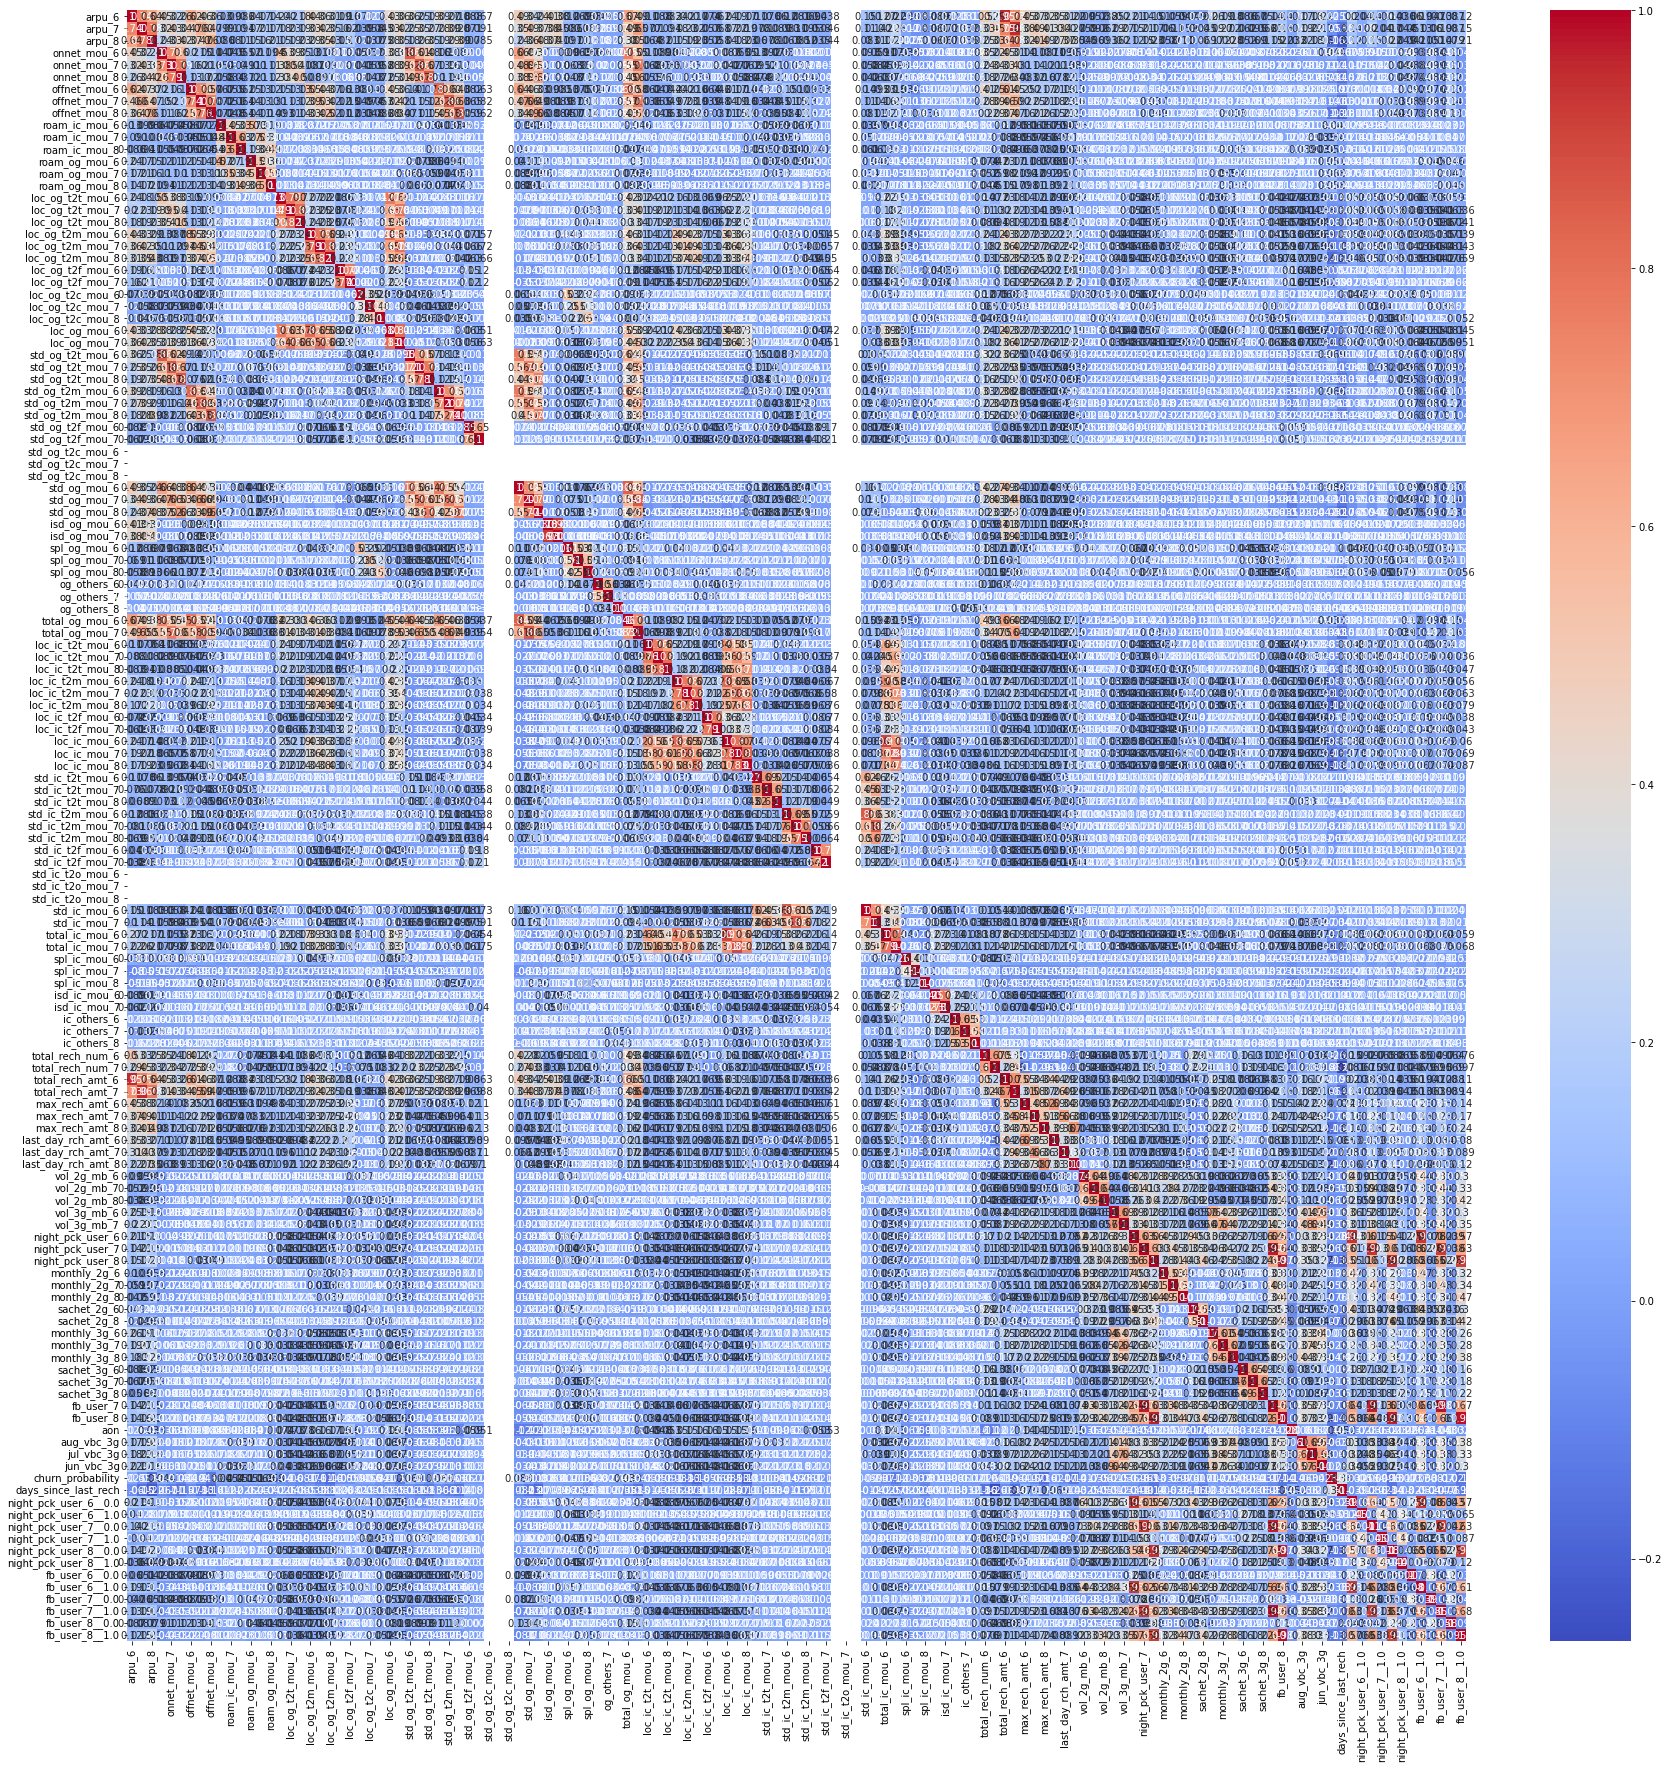

In [29]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [30]:
print(cat_cols)
cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_7', 'fb_user_8']
df.drop(cat_cols,axis=1,inplace=True) 

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [31]:
num_cols = [col for col in df.columns  if col not in date_cols+cat_cols]

In [32]:
y = df.pop('churn_probability')

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train= scaler.fit_transform(df)


In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(random_state=42)

In [36]:
pca.fit(x_train)

PCA(random_state=42)

In [37]:
pca.components_

array([[ 1.97782513e-01,  2.05991772e-01,  1.85299544e-01, ...,
         5.50670215e-02,  3.85453719e-02,  5.32476773e-02],
       [ 2.15188724e-02,  3.01730465e-02,  2.01231136e-02, ...,
        -1.76080659e-01,  3.74479676e-02, -1.70622915e-01],
       [-5.94984610e-02, -7.53024512e-02, -7.03513984e-02, ...,
        -1.97355844e-01, -1.33550158e-03, -1.89782118e-01],
       ...,
       [-0.00000000e+00,  6.29555088e-17, -5.63530705e-17, ...,
         1.12895488e-01,  9.77193711e-02,  2.47223806e-01],
       [ 0.00000000e+00,  5.48098167e-17, -8.70212306e-17, ...,
        -3.75824177e-02, -2.78242592e-02, -7.03936096e-02],
       [ 0.00000000e+00,  1.94497346e-17,  1.17042828e-16, ...,
        -1.86900017e-02, -7.10788420e-03, -1.79824959e-02]])

In [38]:
pca.explained_variance_ratio_

array([1.20111112e-01, 7.47685808e-02, 6.21564924e-02, 3.91344254e-02,
       3.67965895e-02, 3.14007531e-02, 2.57777034e-02, 2.46531949e-02,
       2.41052134e-02, 2.25164686e-02, 2.20411027e-02, 2.01831422e-02,
       2.00628988e-02, 1.93212369e-02, 1.76005987e-02, 1.58079298e-02,
       1.46171634e-02, 1.42841968e-02, 1.37388591e-02, 1.27804930e-02,
       1.25414816e-02, 1.22559848e-02, 1.18923067e-02, 1.15601750e-02,
       1.10808870e-02, 1.05634445e-02, 1.03052243e-02, 1.01027084e-02,
       9.05070367e-03, 8.90946968e-03, 8.72626872e-03, 8.60636033e-03,
       8.20163421e-03, 8.00905497e-03, 7.87356864e-03, 7.52481491e-03,
       7.45637648e-03, 7.28203407e-03, 7.02540141e-03, 6.74552823e-03,
       6.65683155e-03, 6.57354587e-03, 6.27828815e-03, 6.13268153e-03,
       5.88669994e-03, 5.73060429e-03, 5.66778458e-03, 5.62338249e-03,
       5.41499115e-03, 5.32001284e-03, 5.10419013e-03, 4.66113207e-03,
       4.54994023e-03, 4.42613007e-03, 4.30888781e-03, 4.10012601e-03,
      

<BarContainer object of 129 artists>

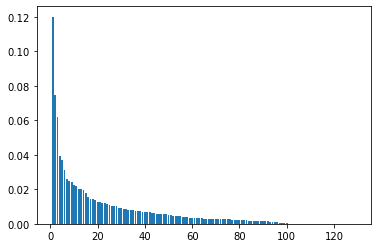

In [39]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [40]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

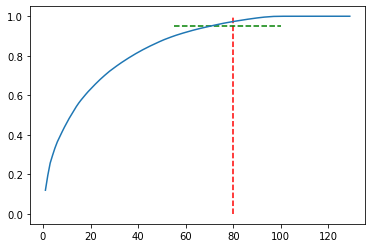

In [41]:
plt.vlines(x=80, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100
, xmin=55, colors="g", linestyles="--")

plt.plot(range(1,len(var_cumu)+1), var_cumu)


In [42]:

pc2 = PCA(n_components=80, random_state=42)

In [ ]:
newdata = pc2.fit_transform(x_train)

In [ ]:
newdata.shape

In [ ]:
cols = ["PC"+str(i) for i in range(1,81)]    

In [ ]:
df_train_pca = pd.DataFrame(newdata, columns=cols)
df_train_pca.head()

In [ ]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [ ]:
corrmat.shape

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
learner_pca = LogisticRegression()

In [ ]:
model_pca = learner_pca.fit(df_train_pca, y)

In [ ]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))